<a href="https://colab.research.google.com/github/newincoding/Machine-Learning/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0472
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 10/

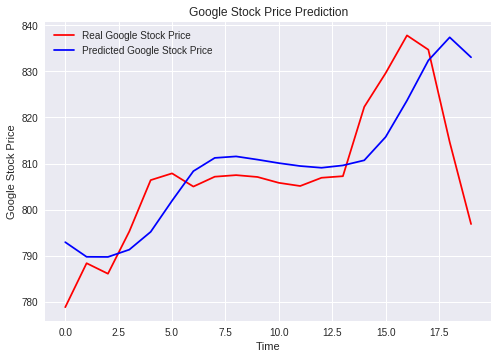

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 27 04:09:07 2018

@author: Roshni_Mohandas
"""

# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#predict stockprice of nothing else than Google
#possible to predict future stock price
#will try to predict upward and downward trends of google stockprice
#LSTM is most powerful model and performs much better than ARIMA
#will use a stacked LSTM
#dropout regularization to avoid overfitting
# use 5 years of google stock price 
# we will predict the first month of 2017
# show you beginning from 2017 to end of 2017
# open stockprice, from beginning of financial year
# select two columns here and click on insert and chart 
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# select right columns. 
# opening balance 
# if we chose single index 1, it will become a single vector not numpy array
# .values makes it numpy array
training_set = dataset_train.iloc[:, 1:2].values


# Feature Scaling
# two best ways of feature scaling , standardization & normalization
# stock price value is not negative hence min max normalizer 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
# 60 timesteps means at each time point, RNN will look at 60 days before time t 
# based on 60 previous time it will try to predict the next output (t+1)
# experiment timestep 
# initialise as empty list 
# RNN will memorise 60 previous values to predict value at next time t+1
# range of index from i-60 to 60 when i is 60, we will get from 0 to 60(59)
# column of index 0
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])  # 60 previous stock prices 
    y_train.append(training_set_scaled[i, 0])   
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
# input shape needs it in this format 
# use reshape function is taken from numpy library 
# Making three dimension ( 1198,60,1)
# 3D shape here 
# keras documentation , look at dimension Recurrent layers , input shapes 
# 3D tensor (array), first batch size , number of time step, indicator )
# X_train.shape[0] gives number of rows 1198 
# gives number of column 60 
# number of predictors 1 (open google stock price )

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
# sequential class to introduce regressor class to represent layer 
# This time its a regressor , not classifier 
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# adding first LSTM layer. 
# type of layer we want t add which is LSTM layer 
# inout three arguments , number of units is first agrument no of LSTM cells or memory elements
# second argument is return sequences, we need to make True
# input_shape , shape of the inout containin X_train, we just have to include only one dimension(timestep) and indicators other one will be automatically taken
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [4]:
np.sqrt(sum((real_stock_price-predicted_stock_price)2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([nan])

In [6]:
len(real_stock_price)

20

In [7]:
len(predicted_stock_price)

20

In [10]:
np.sqrt(sum((real_stock_price-predicted_stock_price)**2))

array([53.4501175])

In [13]:
sum(abs((real_stock_price-predicted_stock_price))/sum(real_stock_price-predicted_stock_price))

array([-3.904922])